# Bharat Ramchire

In [ ]:
# Built the OLS model to predict the flight prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('train_set.csv')
test_data=pd.read_csv('test_set.csv')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.shape,test_data.shape

((10683, 11), (2671, 10))

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#in train data route and total_stops variables have null values so we drop NAs
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# Checking if there are any Duplicate values
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [11]:
# Drop duplicates value
train_data.drop_duplicates(keep='first',inplace=True)

In [12]:
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [14]:
#in dataset price variable we considered as dependent variables other all variables are independent variables

In [15]:
##perfroming EDA for the independent variables

In [16]:
##Airline

In [17]:
train_data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

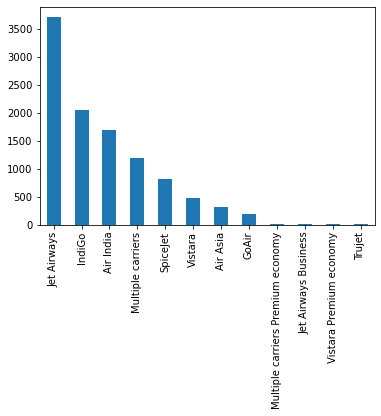

In [18]:
train_data["Airline"].value_counts().plot(kind='bar')

There are more number of flights of Jet Airways.

multiple carririers pemium economy,Jet Airways Business, Vistara Premium economy, Trujet have less no of flights.

In [19]:
train_data["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

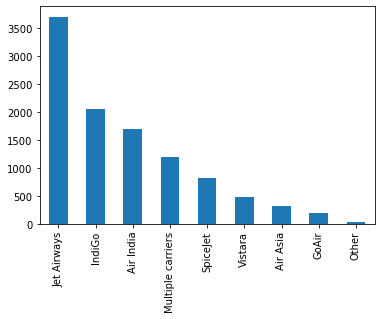

In [20]:
train_data["Airline"].value_counts().plot(kind='bar')

In [21]:
# Date_of_Journey

In [22]:
train_data["Journey_day"] = train_data['Date_of_Journey'].str.split('/').str[0].astype(int)
train_data["Journey_month"] = train_data['Date_of_Journey'].str.split('/').str[1].astype(int)
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [23]:
##source

In [24]:
train_data["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

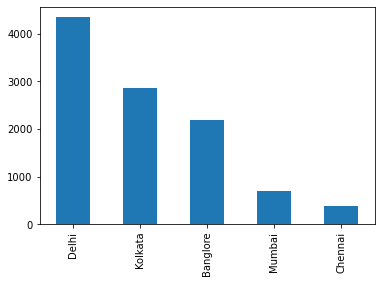

In [25]:
train_data["Source"].value_counts().plot(kind='bar')

In [26]:
#there are more no of flight from dehli location

In [27]:
#Destination

In [28]:
train_data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

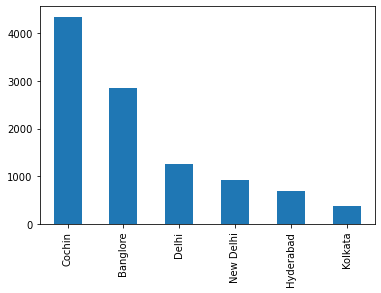

In [29]:
train_data["Destination"].value_counts().plot(kind='bar')

In [30]:
##for the most flights the destination is cochin

In [31]:
#Route

In [32]:
train_data["Route"].value_counts()

DEL ? BOM ? COK                      2376
BLR ? DEL                            1536
CCU ? BOM ? BLR                       979
CCU ? BLR                             724
BOM ? HYD                             621
                                     ... 
BOM ? GOI ? HYD                         1
BLR ? HBX ? BOM ? NAG ? DEL             1
BLR ? HBX ? BOM ? BHO ? DEL             1
CCU ? IXA ? BLR                         1
BLR ? CCU ? BBI ? HYD ? VGA ? DEL       1
Name: Route, Length: 128, dtype: int64

In [33]:
##the most no flights in the route of dehli-bombay-cochin

In [34]:
#Dep_Time

In [35]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [36]:
#Arrival_Time

In [37]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)


In [38]:
#Duration

In [39]:
# Duration convert hours in min.
train_data['Duration']=  train_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Duration']=  test_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [40]:
#Total stops

In [41]:
train_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
test_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [42]:
##count of total flights monthwise

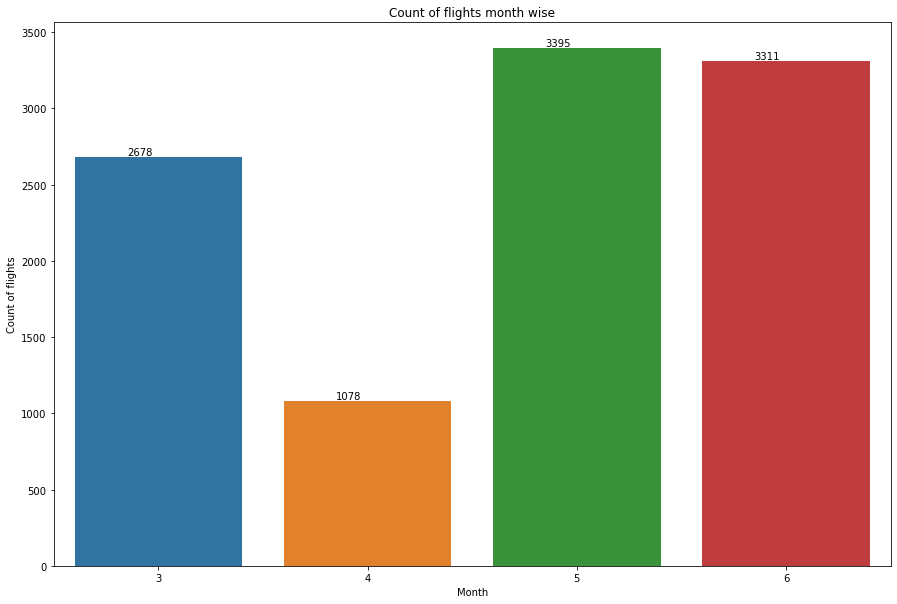

In [43]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  int64 
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   Journey_day      10462 non-null  int32 
 9   Journey_month    10462 non-null  int32 
 10  Dep_hour         10462 non-null  int64 
 11  Dep_min          10462 non-null  int64 
 12  Arrival_hour     10462 non-null  int64 
 13  Arrival_min      10462 non-null  int64 
dtypes: int32(2), int64(7), object(5)
memory usage: 1.4+ MB


In [45]:
#Additional_Info

In [46]:
train_data["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [47]:
#NO Info are twice in value counts both are same we make it one

In [48]:
train_data["Additional_Info"] = train_data["Additional_Info"].replace({'No Info': 'No info'})


In [49]:
train_data["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [50]:
train_data["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [51]:
#Some additional info are neglisible value so we put it into others

In [52]:
train_data["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Other                             14
Name: Additional_Info, dtype: int64

In [53]:
##scatter plot to show relationship between price and airlines

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

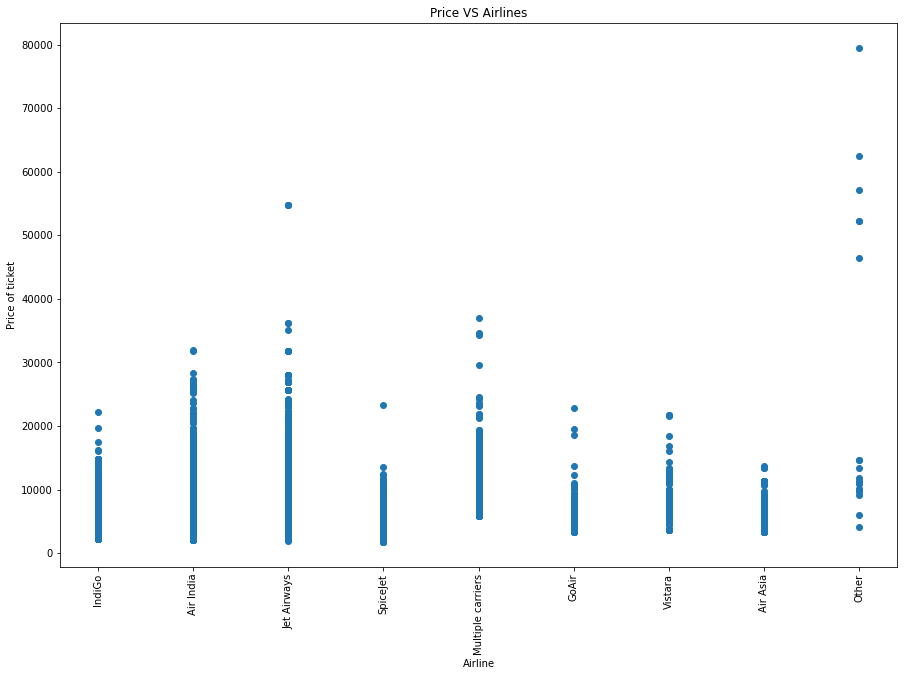

In [54]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [55]:
##Jet airways buisness flights have more price

In [56]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1,No info,13302,1,3,16,50,21,35


In [57]:
#converting categorical data into numerical

In [58]:
data = train_data.drop(["Price"], axis=1)

In [59]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1,No info,13302,1,3,16,50,21,35


In [60]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

In [61]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info


In [62]:
train_numerical_data.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,0,24,3,22,20,1,10
1,445,2,1,5,5,50,13,15
2,1140,2,9,6,9,25,4,25
3,325,1,12,5,18,5,23,30
4,285,1,1,3,16,50,21,35


In [63]:
#performing the label encoding for caegorical columns

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)

In [65]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,3
1,1,3,0,84,3
2,4,2,1,118,3
3,3,3,0,91,3
4,3,0,5,29,3


In [66]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1,No info,13302,1,3,16,50,21,35


In [67]:
#concatenate both categorical and numerical variables
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=train_data['Price']

In [68]:
X.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,3,170,0,24,3,22,20,1,10
1,1,3,0,84,3,445,2,1,5,5,50,13,15
2,4,2,1,118,3,1140,2,9,6,9,25,4,25
3,3,3,0,91,3,325,1,12,5,18,5,23,30
4,3,0,5,29,3,285,1,1,3,16,50,21,35


In [69]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [70]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [71]:
##EDA on TEST DATA

In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   int64 
 8   Total_Stops      2671 non-null   int64 
 9   Additional_Info  2671 non-null   object
dtypes: int64(2), object(8)
memory usage: 208.8+ KB


In [73]:
#Need to do EDA on some variables like Date_of_Journey, Dep_Time, Arrival_Time, Airline, as Additional_Info we done in train data

In [74]:
# Date_of_Journey
test_data["Journey_day"] = test_data['Date_of_Journey'].str.split('/').str[0].astype(int)
test_data["Journey_month"] = test_data['Date_of_Journey'].str.split('/').str[1].astype(int)
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [75]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [76]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [77]:
test_data["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'},inplace=True)

In [78]:
test_data["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',},inplace=True)

In [79]:
#converting categorical data into numerical

In [80]:
test_categorical_data = test_data.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_data.select_dtypes(include=['int64', 'float','int32'])

In [81]:
#Label encode and hot encode categorical columns

In [82]:
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [83]:
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)

In [84]:
test_set.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,3,655,1,6,6,17,30,4,25
1,3,3,0,65,3,240,1,12,5,6,20,10,20
2,4,2,1,76,1,1425,1,21,5,19,15,19,0
3,5,2,1,76,3,780,1,21,5,8,0,21,0
4,0,0,2,16,3,170,0,24,6,23,55,2,45


In [85]:
##Building the machine learning models

In [86]:
#Linear regression

In [87]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [88]:
X_train

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
10606,4,3,0,66,3,685,1,1,5,8,25,19,50
1056,4,0,2,18,1,180,0,18,5,8,20,11,20
5405,4,3,0,66,1,590,1,24,5,8,25,18,15
10155,3,2,1,104,3,895,1,18,5,10,35,1,30
4324,5,2,1,104,3,540,1,15,5,10,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,4,0,2,18,1,165,0,27,4,6,0,8,45
79,7,1,4,127,2,135,0,21,3,8,20,10,35
8153,1,2,1,124,3,2280,3,9,5,5,15,19,15
7025,3,1,4,127,3,145,0,1,5,5,15,7,40


In [89]:
X_test

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
4668,3,0,5,18,3,175,0,1,3,7,10,10,5
2506,3,2,1,104,3,860,1,27,5,6,40,21,0
3385,3,2,1,98,3,355,1,27,3,7,45,13,40
1985,4,3,0,73,1,1730,1,21,5,9,35,14,25
8690,3,2,1,111,3,625,1,9,3,11,55,22,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,4,3,0,66,3,585,1,6,5,18,55,4,40
5955,3,3,0,80,3,265,1,15,4,19,20,23,45
10334,5,2,1,104,3,395,1,21,3,19,0,1,35
1579,8,3,0,73,3,1625,1,18,5,20,20,23,25


In [90]:
y_train

10606    14781
1056      6144
5405     10844
10155     7503
4324     10197
         ...  
350       4544
79        3332
8153     10703
7025      3850
5705      7662
Name: Price, Length: 7323, dtype: int64

In [91]:
y_test

4668     11934
2506      6526
3385      4832
1985      9314
8690      6674
         ...  
1833     13941
5955      3809
10334     6838
1579      9345
420       6442
Name: Price, Length: 3139, dtype: int64

In [92]:
#performing linear regression model

In [93]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
lm.fit(X_train,y_train)

LinearRegression()

In [94]:
print(lm.intercept_)

7214.906076038785


In [95]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Airline,316.501900
Source,-229.600503
Destination,66.965584
Route,-10.400786
Additional_Info,289.397080
Duration,1.269527
Total_Stops,4143.490089
Journey_day,-75.981587
Journey_month,-440.720553
Dep_hour,43.613135


In [96]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 12231022.5808
r_square_value : 0.4339835194318633


In [98]:
##statsmodel

In [99]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const              7214.906076
Airline             316.501900
Source             -229.600503
Destination          66.965584
Route               -10.400786
Additional_Info     289.397080
Duration              1.269527
Total_Stops        4143.490089
Journey_day         -75.981587
Journey_month      -440.720553
Dep_hour             43.613135
Dep_min             -10.560227
Arrival_hour         -2.499040
Arrival_min         -10.421791
dtype: float64

In [100]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     457.4
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:58:26   Log-Likelihood:                -69995.
No. Observations:                7323   AIC:                         1.400e+05
Df Residuals:                    7309   BIC:                         1.401e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7214.9061    368.696     

In [101]:
##from the linar regression model we are getting accuracy 44.8%

In [102]:
#so for the better accuracy we build a descision tree regressor model

In [ ]:
#Descision tree regressor

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [107]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [108]:
y_train_pred =tree.predict(X_train)
y_test_pred =tree.predict(X_test) 

In [112]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [113]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  273.8248357141403
Mean absolute % error:  0.0
R-squared:  0.9964784474635852


In [114]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1979.8710835573036
Mean absolute % error:  9.0
R-squared:  0.8185988090041117


In [115]:
##Prediction on test dataset

In [116]:
Predict=tree.predict(test_set)

In [117]:
Predict

array([8355., 4823., 5608., ..., 9358., 6393., 8614.])

In [118]:
Predict=pd.DataFrame(Predict)

In [135]:
Predict

,0
0,8355.0
1,4823.0
2,5608.0
3,14277.0
4,3383.0
...,...
2666,10203.0
2667,5198.0
2668,9358.0
2669,6393.0


In [136]:
Predict.columns=['Price']

In [137]:
Predict

,Price
0,8355.0
1,4823.0
2,5608.0
3,14277.0
4,3383.0
...,...
2666,10203.0
2667,5198.0
2668,9358.0
2669,6393.0


In [138]:
pred_data= "C:/Users/HPDesktop/sample_submission.csv"    

In [139]:
pred_data

'C:/Users/HPDesktop/sample_submission.csv'

In [144]:
Predict.to_csv("sample_submission.csv", sep = ",")